# 0.0. Imports

In [222]:
import pandas as pd
import numpy as np

import inflection

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image

import datetime

import warnings
warnings.filterwarnings('ignore')


### 0.1. Helper Functions

### 0.2. Loading Data

In [3]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory = False)
df_store_raw = pd.read_csv('data/store.csv', low_memory = False)

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how = 'left', on = 'Store')

In [4]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
452825,921,4,2014-05-22,9901,1241,1,1,0,0,a,a,840.0,9.0,2006.0,0,NaN,NaN,NaN


# 1.0. Descrição dos dados

In [5]:
df1 = df_raw.copy()

### 1.1. Rename Columns

In [6]:
old_cols= df1.columns
snakecase = lambda x: inflection.underscore( x )
new_cols = list ( map( snakecase, old_cols))
# rename
df1.columns = new_cols

### 1.2. Data Dimensions

In [7]:
print('Number of rows: ', df1.shape[0])
print('Number of columns: ', df1.shape[1])

Number of rows:  1017209
Number of columns:  18


### 1.3. Data Types

In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4. Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5. Fillout NA

In [10]:
# competition_distance
print("Max distance: ", df1['competition_distance'].max())
df1['competition_distance'] = df1['competition_distance'].fillna(200000)
print("Max distance: ", df1['competition_distance'].max())

Max distance:  75860.0
Max distance:  200000.0


In [11]:
# competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if np.isnan(x['competition_open_since_month']) == True else x['competition_open_since_month'], axis = 1)

In [12]:
# competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if np.isnan(x['competition_open_since_year']) == True else x['competition_open_since_year'], axis = 1)

In [13]:
# promo2_since_week
print("Distribution of promo 2: \n", df1['promo2'].value_counts())
print("Nan values in promo_2_since_week: ", len(df1['promo2_since_week'][df1['promo2_since_week'].isna() == True]))
print("Stores that didn't have promo 2 and has 'Nan' values in 'promo_2_since_week': ", len(df1[['promo2','promo2_since_week']][(df1['promo2_since_week'].isna() == True) & (df1['promo2'] == 0)]))
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if np.isnan(x['promo2_since_week']) == True else x['promo2_since_week'], axis = 1)

Distribution of promo 2: 
 1    509178
0    508031
Name: promo2, dtype: int64
Nan values in promo_2_since_week:  508031
Stores that didn't have promo 2 and has 'Nan' values in 'promo_2_since_week':  508031


In [14]:
# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if np.isnan(x['promo2_since_year']) == True else x['promo2_since_year'], axis = 1)

In [15]:
# promo_interval
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1['promo_interval'].fillna(0, inplace = True)
df1['month_map'] = df1['date'].dt.month.apply(lambda x: months[x])
df1['is_promo'] = df1.apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)

In [16]:
df1.sample(8).T

,544138,482115,908955,530796,138281,491534,899953,843327
store,804,106,1016,842,22,605,934,58
day_of_week,6,5,1,4,7,4,2,3
date,2014-03-01 00:00:00,2014-04-25 00:00:00,2013-04-08 00:00:00,2014-03-13 00:00:00,2015-03-29 00:00:00,2014-04-17 00:00:00,2013-04-16 00:00:00,2013-06-05 00:00:00
sales,7216,6941,8947,13981,0,9218,5322,5258
customers,631,694,735,889,0,684,652,448
open,1,1,1,1,0,1,1,1
promo,0,0,1,0,0,1,0,1
state_holiday,0,0,0,0,0,0,0,0
school_holiday,0,1,0,0,0,1,0,0
store_type,c,a,c,d,a,d,a,a


In [17]:
pd.DataFrame([df1.isna().sum(), df1.dtypes]).T

,0,1
store,0,int64
day_of_week,0,int64
date,0,datetime64[ns]
sales,0,int64
customers,0,int64
open,0,int64
promo,0,int64
state_holiday,0,object
school_holiday,0,int64
store_type,0,object


### 1.6. Change Types

In [18]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] =  df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### 1.7. Descriptive Statistics

In [19]:
df2 = df1.copy()
num_attributes = df2.select_dtypes(include = ['int32','int64','float64'])
cat_attributes = df2.select_dtypes(exclude = ['int32','int64','float64','datetime64[ns]'])

In [20]:
# Central Tendency: mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
# Dispersion : std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#Concatenate
stats = pd.concat([ct1,ct2,d1,d2,d3,d4,d5,d6]).T.reset_index()
stats.columns = ['attributes','mean','median','std','min','max','range','skew','kurtosis']
stats

,attributes,mean,median,std,min,max,range,skew,kurtosis
0,store,558.429727,558.0,321.908493,1.0,1115.0,1114.0,-0.000955,-1.200524
1,day_of_week,3.998341,4.0,1.997390,1.0,7.0,6.0,0.001593,-1.246873
2,sales,5773.818972,5744.0,3849.924283,0.0,41551.0,41551.0,0.641460,1.778375
3,customers,633.145946,609.0,464.411506,0.0,7388.0,7388.0,1.598650,7.091773
4,open,0.830107,1.0,0.375539,0.0,1.0,1.0,-1.758045,1.090723
5,promo,0.381515,0.0,0.485758,0.0,1.0,1.0,0.487838,-1.762018
6,school_holiday,0.178647,0.0,0.383056,0.0,1.0,1.0,1.677842,0.815154
7,competition_distance,5935.442677,2330.0,12547.646829,20.0,200000.0,199980.0,10.242344,147.789712
8,competition_open_since_month,6.786849,7.0,3.311085,1.0,12.0,11.0,-0.042076,-1.232607
9,competition_open_since_year,2010.324840,2012.0,5.515591,1900.0,2015.0,115.0,-7.235657,124.071304


In [21]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

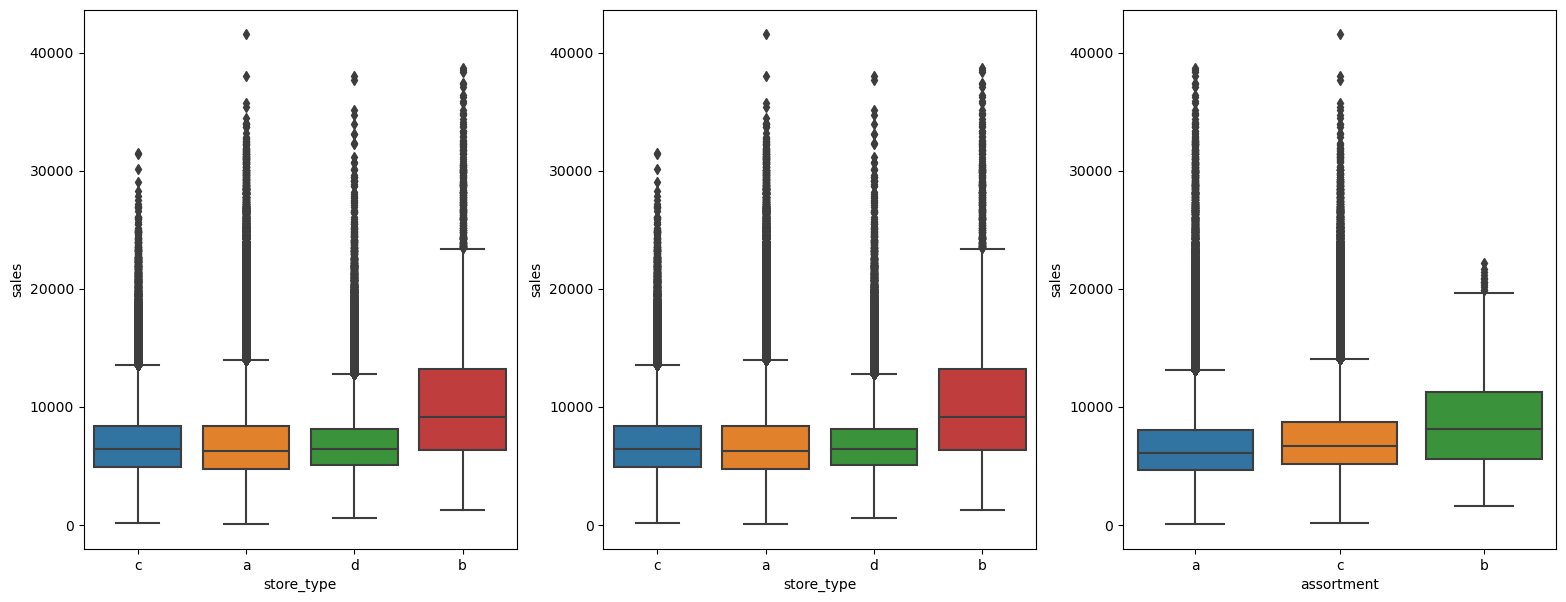

In [22]:
# Tamanho
Figura, Eixo = plt.subplots(figsize=(19, 7))

plt.subplot(1, 3 ,1)
sns.boxplot(x = 'store_type',y = 'sales', data = df2[(df2['sales'] != 0) & (df2['store_type'] != '0')])
plt.subplot (1, 3, 2)
sns.boxplot(x = 'store_type',y = 'sales', data = df2[df2['sales'] != 0])
plt.subplot (1, 3, 3)
sns.boxplot(x = 'assortment',y = 'sales', data = df2[df2['sales'] != 0])

# 2.0. Feature Engineering

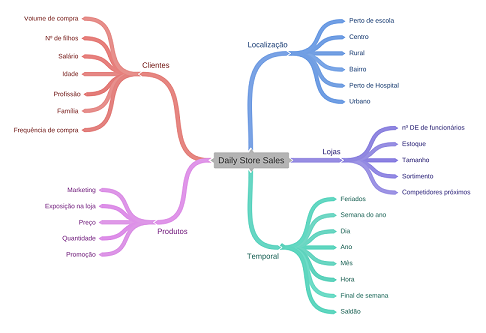

In [23]:
df3 = df2.copy()
Image('Img\mind_map_hypotesis.png', width = 800, height = 500)

### 2.1. Criação das Hipóteses

#### 2.2.1. Hipóteses Loja

- Lojas com maior quadro de funcionários deveriam vender mais

- Lojas com maior estoque deveriam vender mais

- Lojas de maior porte deveriam vender mais

- Lojas de menor porte deveriam vender menos

- Lojas com maior sortimento deveriam vender mais

- Lojas com competidores mais próximos deveriam vender menos

- Lojas com competidores mais distantes deveriam vender mais

#### 2.2.2. Hipóteses produto

- Lojas que investem mais em marketing deveriam vender mais

- Lojas que expõem mais os produtos na vitrine deveriam vender mais

- Lojas que tem preços menores deveriam vender mais

- Lojas que tem preços menores por mais tempo deveriam vender mais

- Lojas com promoções ativas por mais tempo deveriam vender mais

- Lojas com mais dias de promoção deveriam vender mais

- Lojas com promoções consecutivas deveriam vender mais

#### 2.2.3. Hipóteses Tempo

- Lojas abertas dirante o Natala deveriam vender mais

- Lojas deveriam vender mais ao longo dos anos

- Lojas deveriam vender mais no segundo semertre do ano

- Lojas deveriam vender mais depois do dia 10 de cada mês

- Lojas deveriam vender menos aos finais de semana

- Lojas deveriam vender menos durante feriados escolares

### 2.2. Lista de hipóteses finais

- Lojas com maior sortimento deveriam vender mais

- Lojas com competidores mais próximos deveriam vender menos

- Lojas com competidores à mais tempo deveriam vender mais

- Lojas com promoções ativas por mais tempo deveriam vender mais

- Lojas com mais dias de promoção deveriam vender mais

- Lojas com promoções consecutivas deveriam vender mais

- Lojas abertas dirante o Natala deveriam vender mais

- Lojas deveriam vender mais ao longo dos anos

- Lojas deveriam vender mais no segundo semertre do ano

- Lojas deveriam vender mais depois do dia 10 de cada mês

- Lojas deveriam vender menos aos finais de semana

- Lojas deveriam vender menos durante feriados escolares

### 2.3. Feature Engineering

In [24]:
df3 = df2.copy()
# year
df3['year'] = df3['date'].dt.year
# month
df3['month'] = df3['date'].dt.month
# day
df3['day'] = df3['date'].dt.day
# week of year
df3['week_of_year'] = df3['date'].dt.weekofyear
# year week
df3['year_week'] = df3['date'].dt.strftime('%Y-%W')

# competition since
df3['competition_since'] = df3.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis = 1)
df3['competition_time_month'] = ((df3['date'] - df3['competition_since']) / 30).apply(lambda x: x.days).astype(int)
# promo since
df3['promo_since'] = df3['promo2_since_year'].astype(str) + '-' + df3['promo2_since_week'].astype(str)
df3['promo_since'] = df3['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))
df3['promo_time_week'] = ((df3['date'] - df3['promo_since']) / 7).apply(lambda x: x.days).astype(int)
# assortment
dict_assort = {'a': 'basic', 'b': 'extra','c': 'extended'}
df3['assortment'] = df3['assortment'].apply(lambda x: dict_assort[x])
# state holiday
dict_holiday = {'0': 'regular_day', 'a':'public_holiday','b': 'easter','c': 'christmas'}
df3['state_holiday'] = df3['state_holiday'].apply(lambda x: dict_holiday[x])

In [25]:
df3.sample(5).T

,391574,459088,487115,509574,534690
store,1096,494,646,805,276
day_of_week,6,5,1,2,7
date,2014-07-19 00:00:00,2014-05-16 00:00:00,2014-04-21 00:00:00,2014-04-01 00:00:00,2014-03-09 00:00:00
sales,4397,6191,0,6193,0
customers,521,970,0,533,0
open,1,1,0,1,0
promo,0,0,0,1,0
state_holiday,regular_day,regular_day,easter,regular_day,regular_day
school_holiday,0,0,1,0,0
store_type,a,b,a,d,a


# 3.0. Filtragem de Variáveis

In [26]:
df4 = df3.copy()

### 3.1. Filtragem das linhas

In [27]:
df4 = df4[(df4['open'] != 0) & (df4['sales'] > 0)]

### 3.2 Seleção das colunas

In [28]:
cols_drop = ["customers","open","promo_interval","month_map"]
df4 =df4.drop(cols_drop, axis = 1)

# 4.0. Análise Exploratória

In [29]:
df5 = df4.copy()

### 4.1. Análise Univariada

#### 4.1.1. Response Variable

<AxesSubplot:xlabel='sales'>

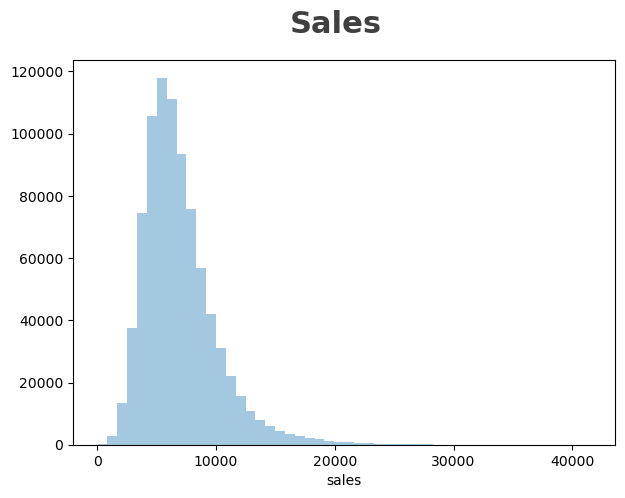

In [30]:
Figura, Eixo = plt.subplots(figsize=(7, 5))
plt.suptitle('Sales', fontsize=22, color='#404040', fontweight=600)
sns.distplot(df4['sales'], kde = False)

#### 4.1.2. Numerical Variables

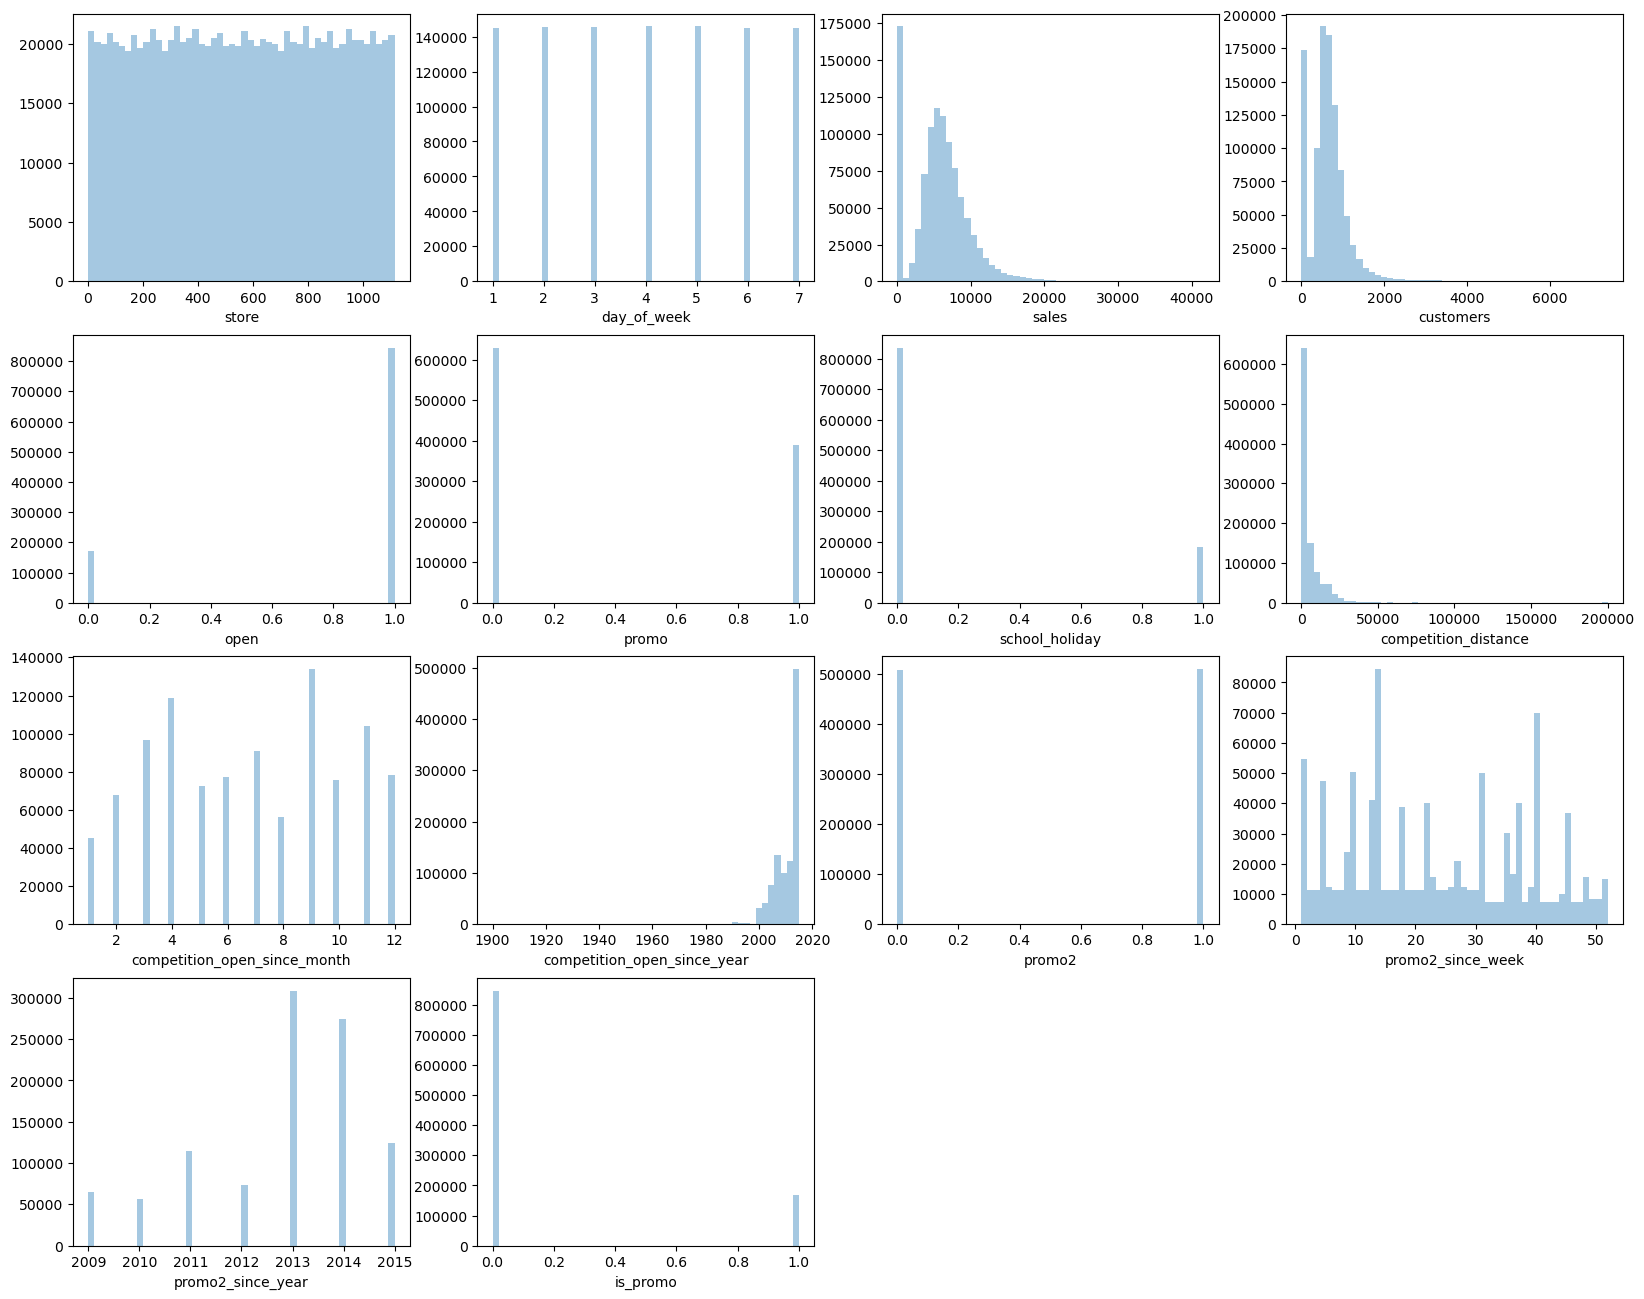

In [31]:
plt.rcParams["figure.figsize"] = (20,16)
for i in range(len(num_attributes.columns)):
    cols = num_attributes.columns
    plt.subplot(4, 4, i+1)
    sns.distplot(num_attributes[cols[i]], kde = False)

#### 4.1.3.Categorical Variables

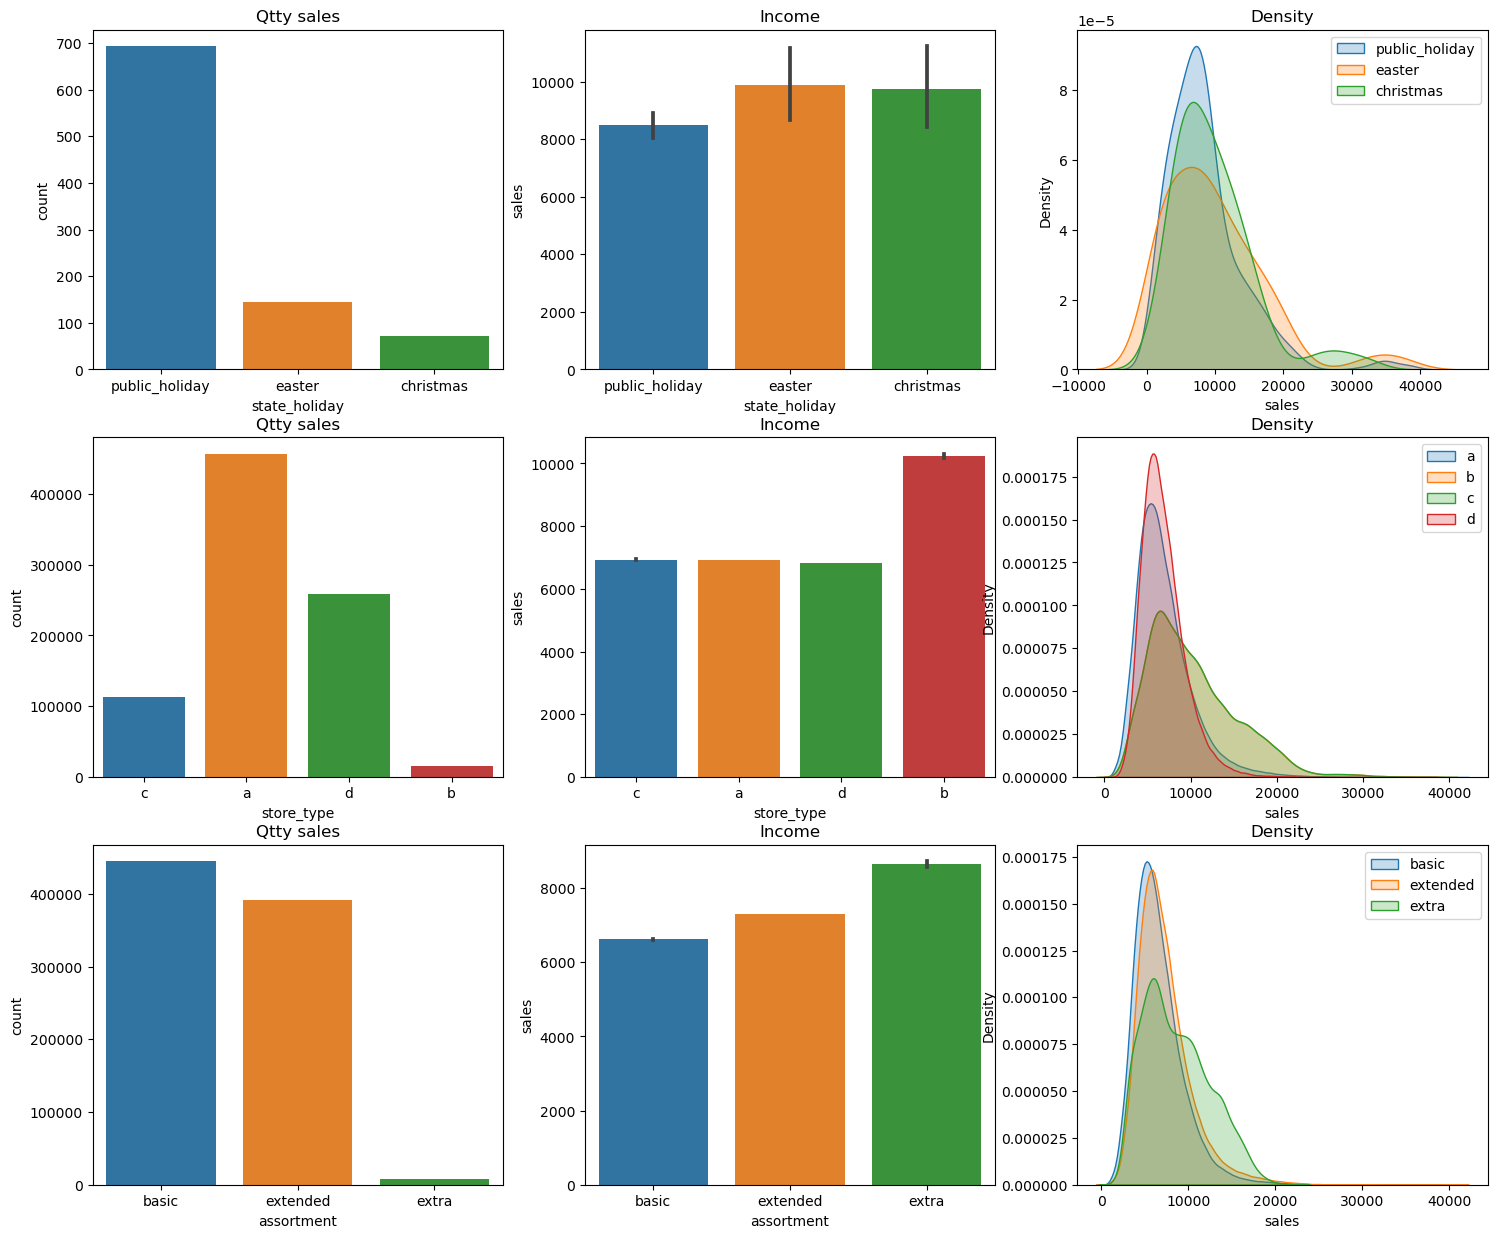

In [52]:
plt.rcParams["figure.figsize"] = (18,15)
plt.subplot(3, 3, 1)
plt.title('Qtty sales')
sns.countplot(x = df5['state_holiday'][df5['state_holiday'] != 'regular_day'] )
plt.subplot(3, 3, 2)
plt.title('Sales')
sns.barplot(x = df5['state_holiday'][df5['state_holiday'] != 'regular_day'] , y = df5['sales'])
plt.subplot(3, 3, 3)
plt.title('Density')
sns.kdeplot(x = df5['sales'][df5['state_holiday'] == 'public_holiday'] , label = 'public_holiday', shade = True)
sns.kdeplot(x = df5['sales'][df5['state_holiday'] == 'easter'] , label = 'easter', shade = True)
sns.kdeplot(x = df5['sales'][df5['state_holiday'] == 'christmas'] , label = 'christmas', shade = True)
plt.legend(labels = ['public_holiday','easter','christmas'],loc = 'upper right')


plt.subplot(3, 3, 4)
plt.title('Qtty sales')
sns.countplot(x = df5['store_type'] )
plt.subplot(3, 3, 5)
plt.title('Sales')
sns.barplot(x = df5['store_type'] , y = df5['sales'])
plt.subplot(3, 3, 6)
plt.title('Density')
sns.kdeplot(x = df5['sales'][df5['store_type'] == 'a'] , label = 'a', shade = True)
sns.kdeplot(x = df5['sales'][df5['store_type'] == 'b'] , label = 'b', shade = True)
sns.kdeplot(x = df5['sales'][df5['store_type'] == 'b'] , label = 'c', shade = True)
sns.kdeplot(x = df5['sales'][df5['store_type'] == 'd'] , label = 'd', shade = True)
plt.legend(labels = ['a','b','c','d'],loc = 'upper right')

plt.subplot(3, 3, 7)
plt.title('Qtty sales')
sns.countplot(x = df5['assortment'] )
plt.subplot(3, 3, 8)
plt.title('Sales')
sns.barplot(x = df5['assortment'] , y = df5['sales'])
plt.subplot(3, 3, 9)
plt.title('Density')
sns.kdeplot(x = df5['sales'][df5['assortment'] == 'basic'] , label = 'basic', shade = True)
sns.kdeplot(x = df5['sales'][df5['assortment'] == 'extended'] , label = 'extended', shade = True)
sns.kdeplot(x = df5['sales'][df5['assortment'] == 'extra'] , label = 'extra', shade = True)
plt.legend(labels = ['basic','extended','extra'],loc = 'upper right')



### 4.2. Análise Bivariada

- **Hipótese:** Lojas com maior sortimento deveriam vender mais\
**VERDADEIRA** : Lojas com maior sortimento (extended e extra) tem um faturamento médio maior

<AxesSubplot:title={'center':'Sales by assortment'}, xlabel='year_week'>

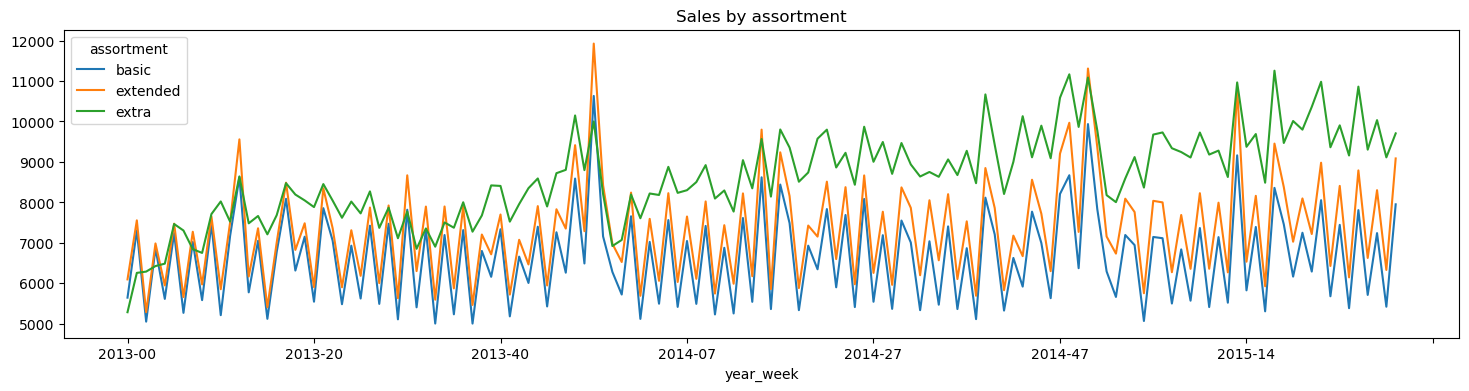

In [48]:
assort_sales = df5[['assortment','sales','date']].groupby('assortment').agg({'sales':'sum', 'date': 'count'}).reset_index().rename(columns={'date':'count'})
plt.rcParams["figure.figsize"] = (18,4)

assort_sales_2 = df5[['year_week','assortment','sales']].groupby(['year_week','assortment']).mean().reset_index()
assort_sales_2 = assort_sales_2.pivot(index = 'year_week', columns = 'assortment', values = 'sales')
assort_sales_2.plot(title = 'Sales by assortment')

In [51]:
assort_sales['avg_sales'] = assort_sales['sales']/assort_sales['count']
assort_sales

,assortment,sales,count,avg_sales
0,basic,2945750070,444875,6621.523057
1,extended,2856484241,391254,7300.843547
2,extra,70946312,8209,8642.503594


-  **Hipótese:**  Lojas com competidores mais próximos deveriam vender menos\
**FALSA** : As vendas não são impactadas pela distância do competidor

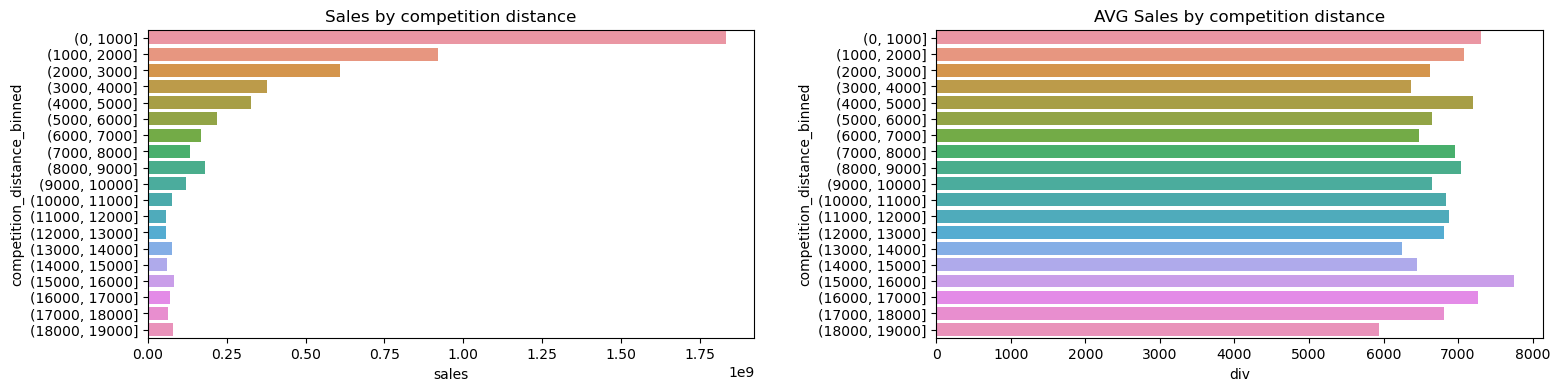

In [36]:
plt.rcParams["figure.figsize"] = (18,4)
plt.subplot(1, 2, 1)
comp_dist = df5[['store','competition_distance','sales']]
bins = list(np.arange(0,20000, 1000))
comp_dist['competition_distance_binned'] = pd.cut(comp_dist['competition_distance'], bins = bins)
comp_dist_2 = comp_dist.groupby('competition_distance_binned').sum().reset_index()

plt.title ('Sales by competition distance')
sns.barplot(y = 'competition_distance_binned', x = 'sales', data = comp_dist_2)
plt.subplot(1, 2, 2)
comp_dist_3 = comp_dist.groupby('competition_distance_binned').agg({'competition_distance':'count', 'sales': 'sum'}).reset_index()
comp_dist_3['div'] = comp_dist_3['sales'] / comp_dist_3['competition_distance']
plt.title ('AVG Sales by competition distance')
sns.barplot(y = 'competition_distance_binned', x = 'div', data = comp_dist_3)
plt.subplots_adjust(wspace=0.3)

<AxesSubplot:title={'center':'Competition distance vs Sales - scatterplot'}, xlabel='competition_distance', ylabel='sales'>

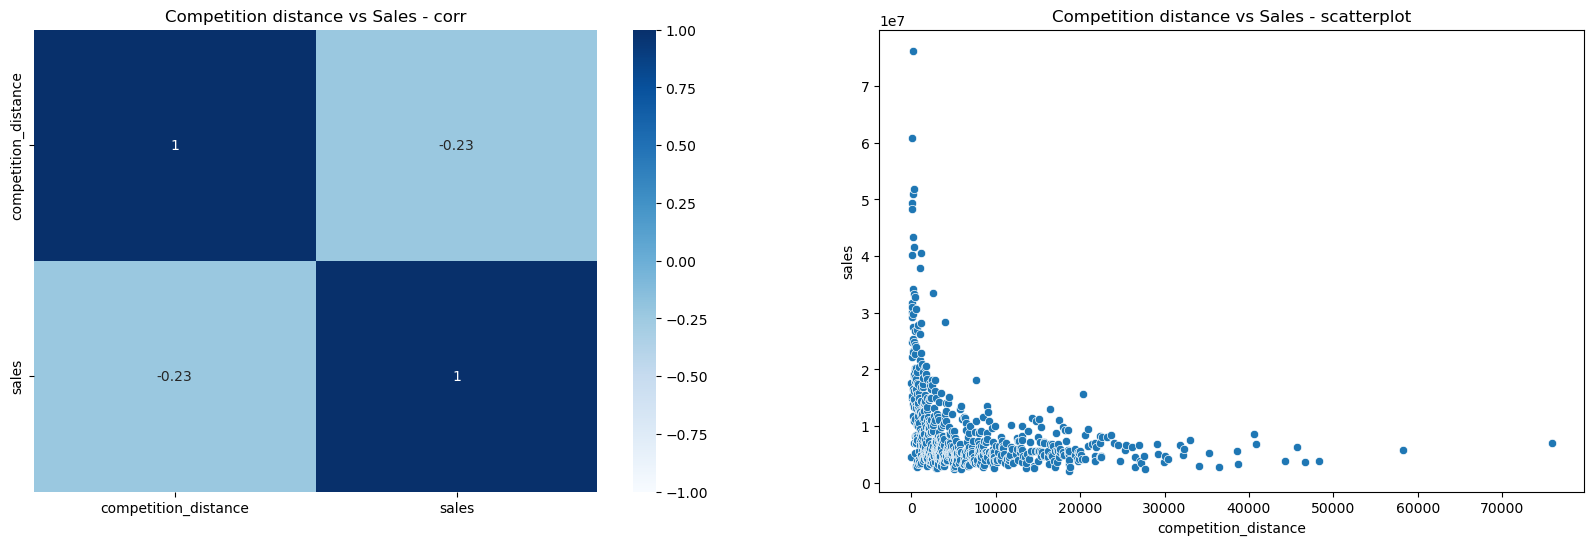

In [154]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.title ('Competition distance vs Sales - corr')
sns.heatmap(comp_dist[['competition_distance','sales']].corr(method = 'pearson'), annot = True, cmap = 'Blues', vmin = -1, vmax = 1)
plt.subplot(1, 2, 2)
comp_dist = comp_dist.groupby('competition_distance').sum().reset_index()
plt.title ('Competition distance vs Sales - scatterplot')
sns.scatterplot(x = comp_dist['competition_distance'][comp_dist['competition_distance']<200000], y = comp_dist['sales'], data = comp_dist)


- **Hipótese:**  Lojas com competidores à mais tempo deveriam vender mais \
**FALSA** : Quanto maior o tempo de competição, menor o faturamento

<AxesSubplot:title={'center':'Sales x Competition time (month)'}, xlabel='competition_time_month', ylabel='sales'>

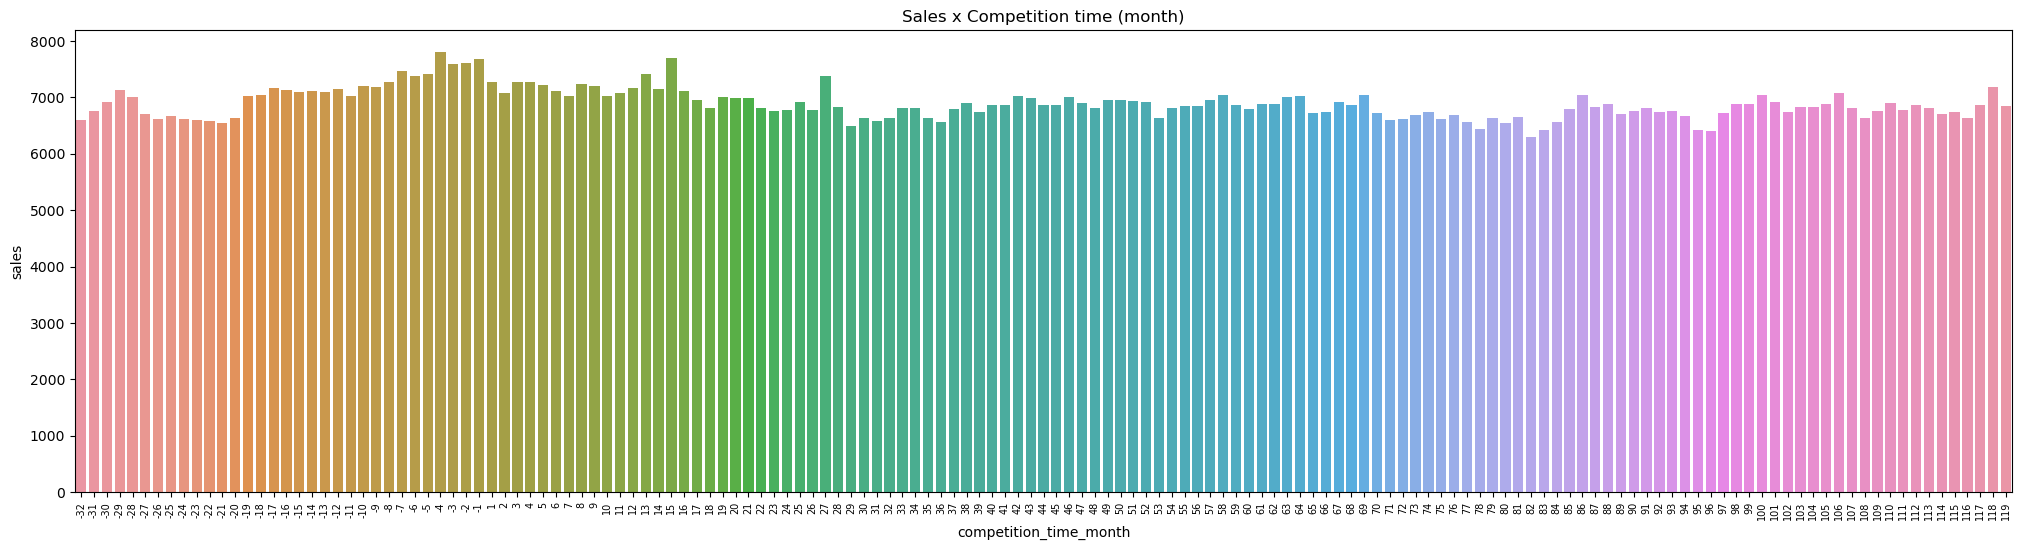

In [133]:
plt.rcParams["figure.figsize"] = (25,6)
plt.title("Sales x Competition time (month)")
competition_since = df5[['competition_time_month','sales','year']]
competition_since = competition_since[competition_since['year'] != 2015]
competition_since = competition_since[(competition_since['competition_time_month'] < 120) & (competition_since['competition_time_month'] != 0)]
competition_since = competition_since.groupby('competition_time_month').mean().reset_index()
plt.xticks(fontsize = 7, rotation = 90)
sns.barplot(x = 'competition_time_month', y = 'sales', data = competition_since)

<AxesSubplot:title={'center':'Tendency'}>

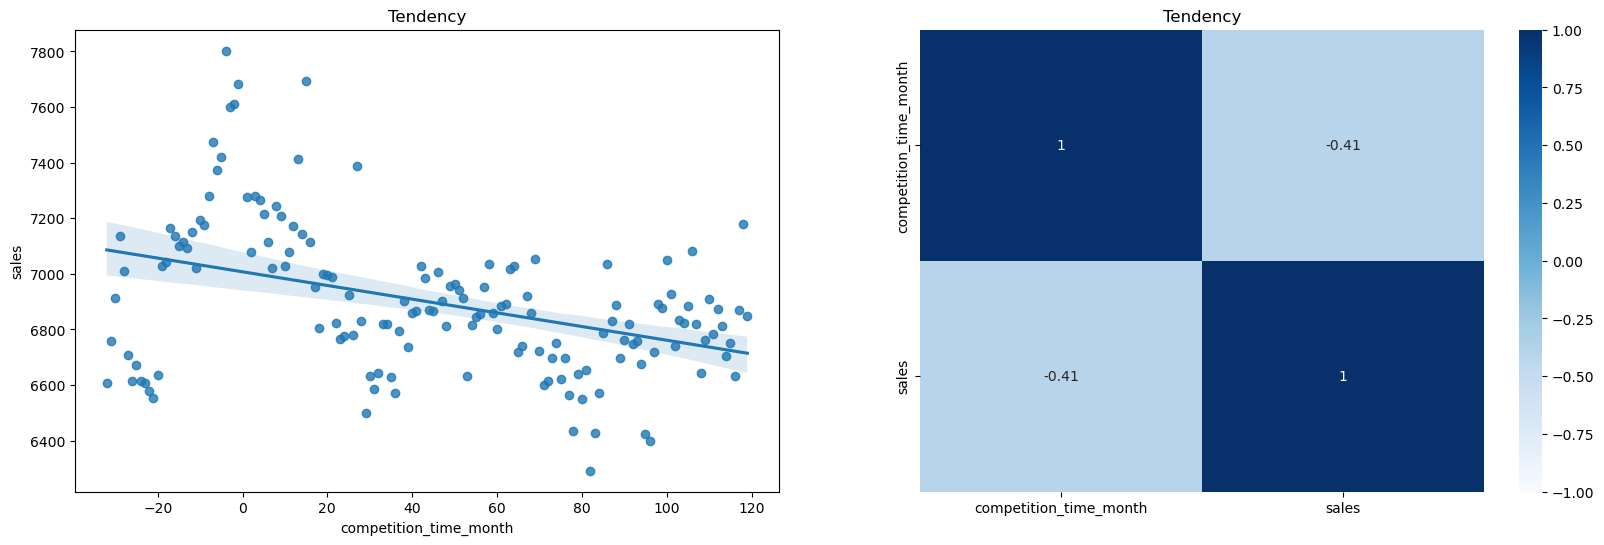

In [156]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.title("Tendency")
sns.regplot(x = 'competition_time_month', y = 'sales', data = competition_since)

plt.subplot(1, 2, 2)
plt.title("Tendency")
sns.heatmap(competition_since[['competition_time_month','sales']].corr(method = 'pearson'), annot = True,cmap = 'Blues', vmin = -1, vmax = 1 )

-  **Hipótese:** Lojas com mais dias de promoção deveriam vender mais\
**FALSA** : As variações foram identificadas devido a aletoriedade dos dados, portanto não é possível confirmar esta afirmação

<AxesSubplot:title={'center':'Tendency'}, xlabel='percentage', ylabel='sales'>

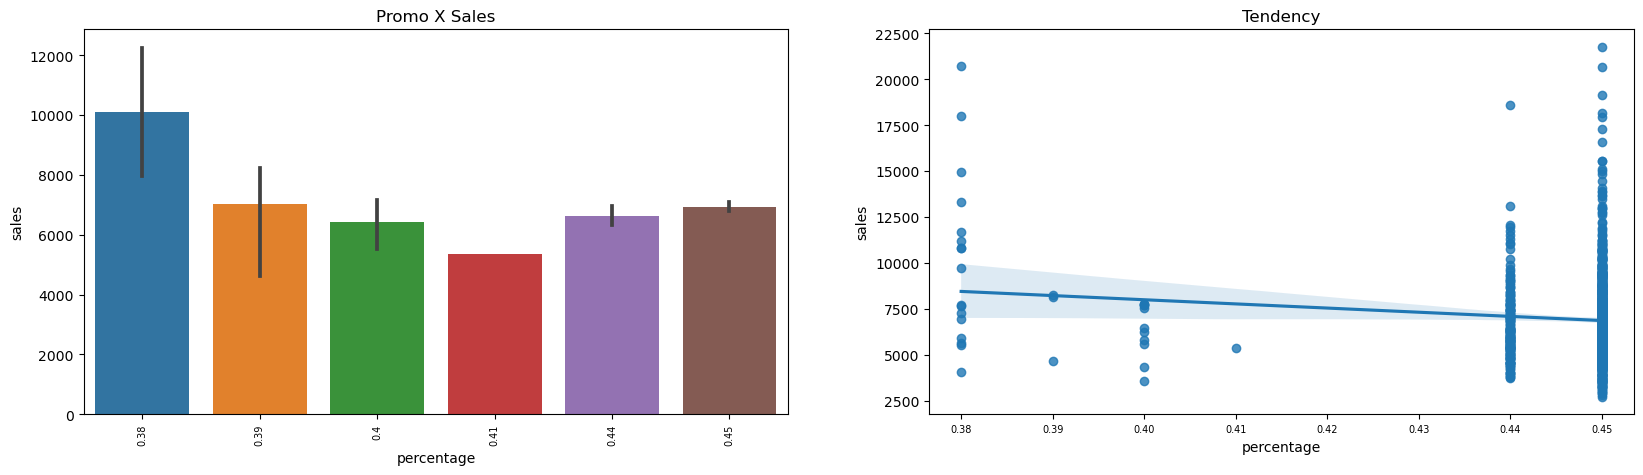

In [215]:
plt.rcParams["figure.figsize"] = (20,5)
plt.subplot(1, 2, 1)
plt.xticks(fontsize=7,rotation = 90)
plt.title("Promo X Sales")
promo = df5[['store','promo','sales','date']].groupby('store').agg({'sales':'mean', 'date': 'count','promo':'sum'}).reset_index().rename(columns={'date':'days','promo':'days_of_promo'})
promo['percentage'] = (promo['days_of_promo'] / promo['days']).round(2)

sns.barplot(x = 'percentage', y = 'sales', data = promo)

plt.subplot(1, 2, 2)
plt.title("Tendency")
plt.xticks(fontsize=7)
sns.regplot(x = 'percentage', y = 'sales', data = promo)

- **Hipótese:** Lojas com promoções ativas por mais tempo deveriam vender mais\
**FALSA** Lojas com promocoes ativas por mais tempo vendem menos, depois de um certo periodo de promocao

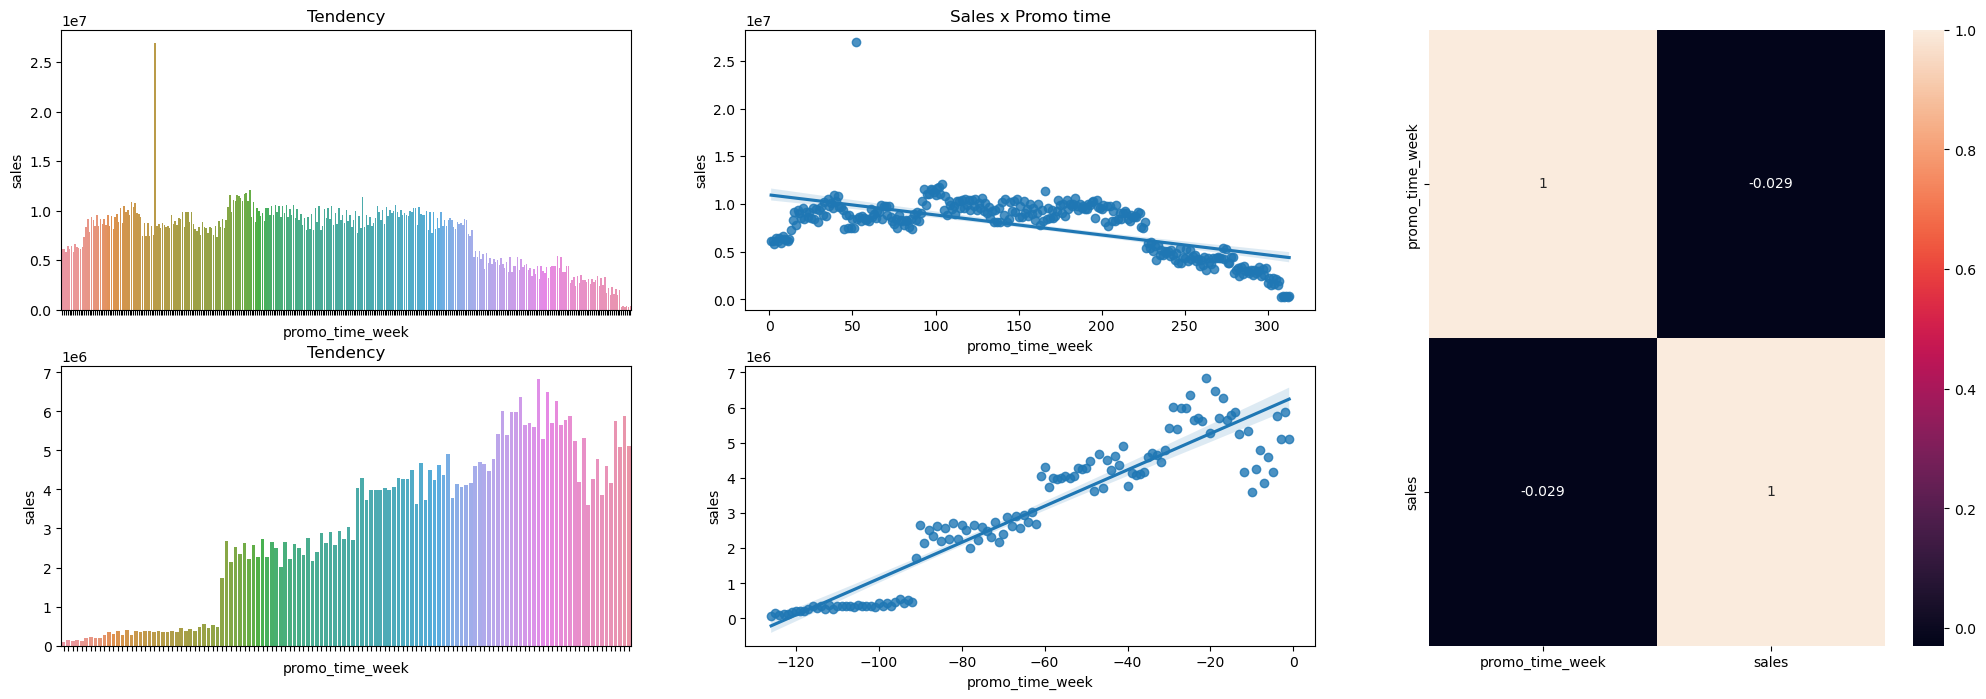

In [234]:
plt.rcParams["figure.figsize"] = (25,8)
time_promo = df5[['promo_time_week', 'sales']].groupby( 'promo_time_week').sum().reset_index()

grid = matplotlib.gridspec.GridSpec( 2, 3 )
plt.title("Sales x Promo time")
plt.subplot( grid[0,0] )
time_promo_2 = time_promo[time_promo['promo_time_week'] > 0] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=time_promo_2 ).set(xticklabels=[]);

plt.title("Tendency")
plt.subplot( grid[0,1] )
sns.regplot( x='promo_time_week', y='sales', data=time_promo_2 );

plt.title("Sales x Promo time")
plt.subplot( grid[1,0] )
time_promo_3 = time_promo[time_promo['promo_time_week'] < 0] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=time_promo_3 ).set(xticklabels=[]);

plt.title("Tendency")
plt.subplot( grid[1,1] )
sns.regplot( x='promo_time_week', y='sales', data=time_promo_3 );

plt.subplot( grid[:,2] )
sns.heatmap( time_promo.corr( method='pearson' ), annot=True );

-  **Hipótese:** Lojas com promoções consecutivas deveriam vender mais\
**FALSA** Lojas com promocoes consecutivas vendem menos

In [236]:
df5[['promo', 'promo2', 'sales']].groupby( ['promo', 'promo2'] ).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


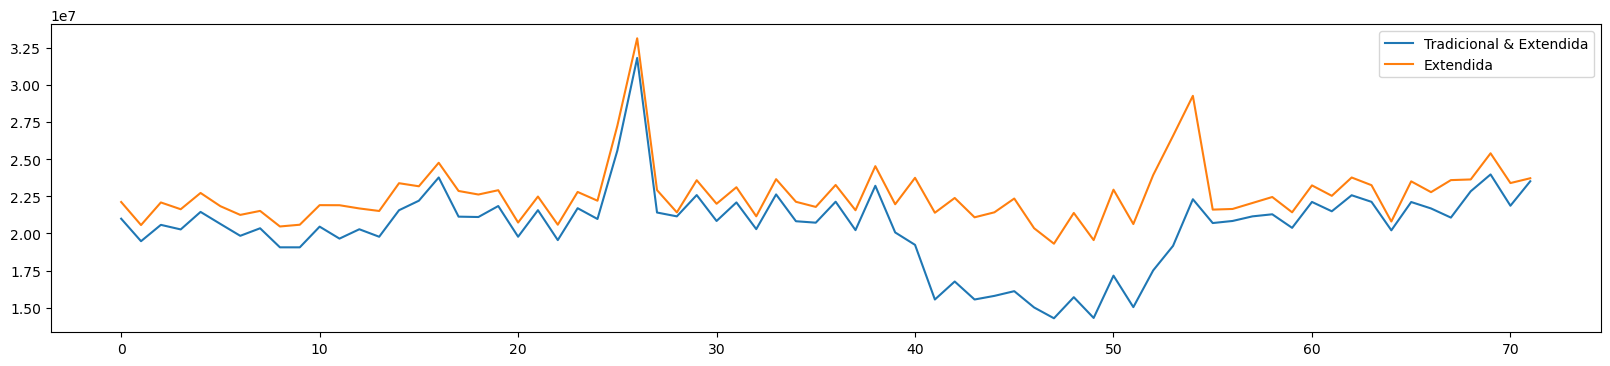

In [238]:
plt.rcParams["figure.figsize"] = (20,4)
promos = df5[( df5['promo'] == 1 ) & ( df5['promo2'] == 1 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
ax = promos.plot()

promos_1 = df5[( df5['promo'] == 1 ) & ( df5['promo2'] == 0 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
promos_1.plot( ax=ax )

ax.legend( labels=['Tradicional & Extendida', 'Extendida']);

### 4.3. Análise Multivariada